# Lab 4

## Problem 1

a) Loading all CSV files into separate dataframes and storing them in a dictionary `crypto` with short identifiers.

In [2]:
import pandas as pd

basePath = 'crypto/'
cryptoDFs = {}
# Read contents of filenames.txt
with open(basePath + 'filenames.txt','r') as file:
    # Add entry to dictionary
    for line in file:
        filename = line.strip() # get filename
        df = pd.read_csv(basePath+filename) # create data frame from CSV in file
        cryptoDFs[filename[0:3]] = df # add entry to dict. Tuple = cryptoName:dataframe
        #print(df.info())

#print(cryptoDFs.keys())

b) Calculating the daily volatility for all cryptos and storing my results in a new dataframe `volatilityDf`.

In [3]:
volatilityDf = pd.DataFrame()
for crypto in cryptoDFs:
    df = cryptoDFs[crypto]
    vola = (df["High"]-df["Low"])/df["Open"]
    volatilityDf[crypto] = vola

print(volatilityDf.columns.tolist())

['ADA', 'BCH', 'BTC', 'EOS', 'ETH', 'LIN', 'LTC', 'USD', 'XRP', 'XTZ']


c) Creating a boxplot that shows the volatility of all ten currencies.

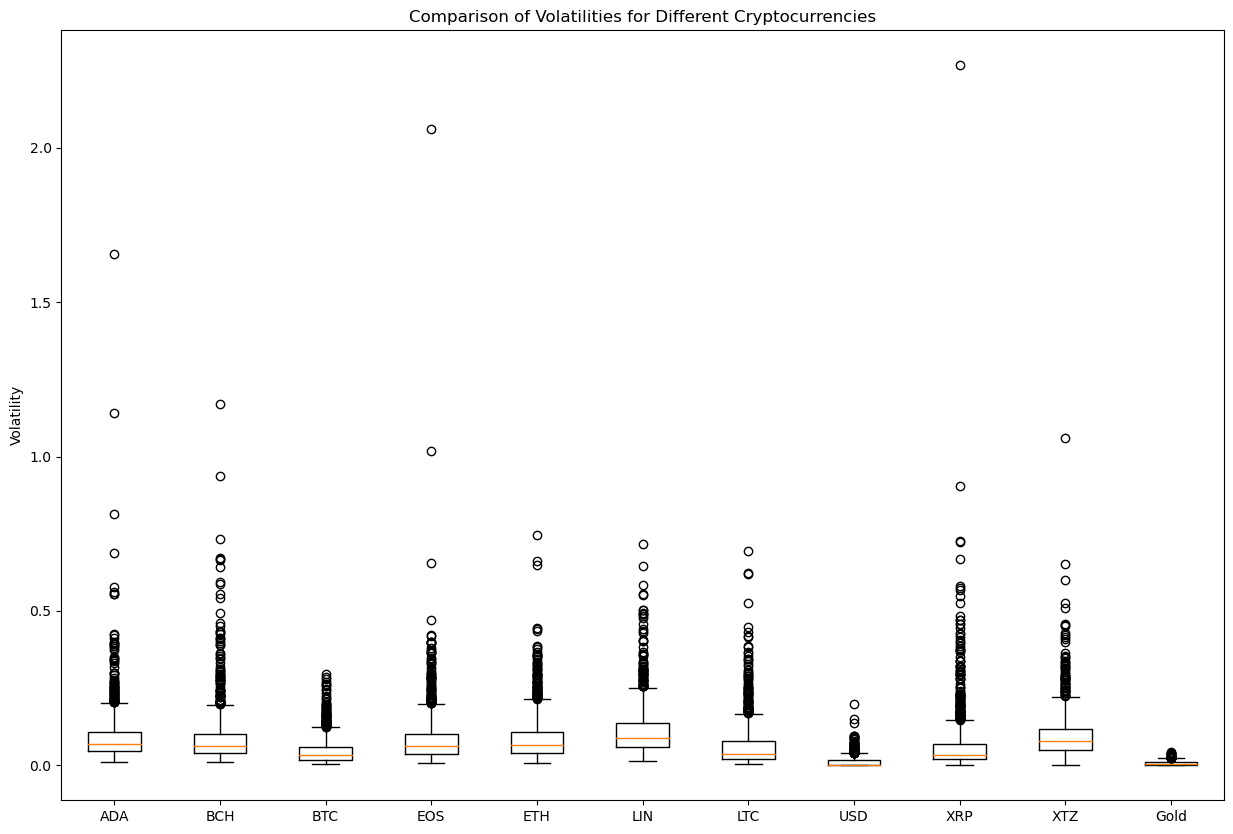

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 

def plotBoxPlot():
    data = [volatilityDf[crypto].dropna() for crypto in volatilityDf.columns] # QUESTION: Needed to drip NaN values?
    plt.figure(figsize=(15, 10))  # Set the figure size
    # plt.boxplot(volatilityDf.values, labels=volatilityDf.columns)
    plt.boxplot(data, labels=volatilityDf.columns)
    plt.ylabel("Volatility")
    plt.title("Comparison of Volatilities for Different Cryptocurrencies")
    plt.show()

plotBoxPlot()

How does the cryptomarket compare to the volatility  of gold?

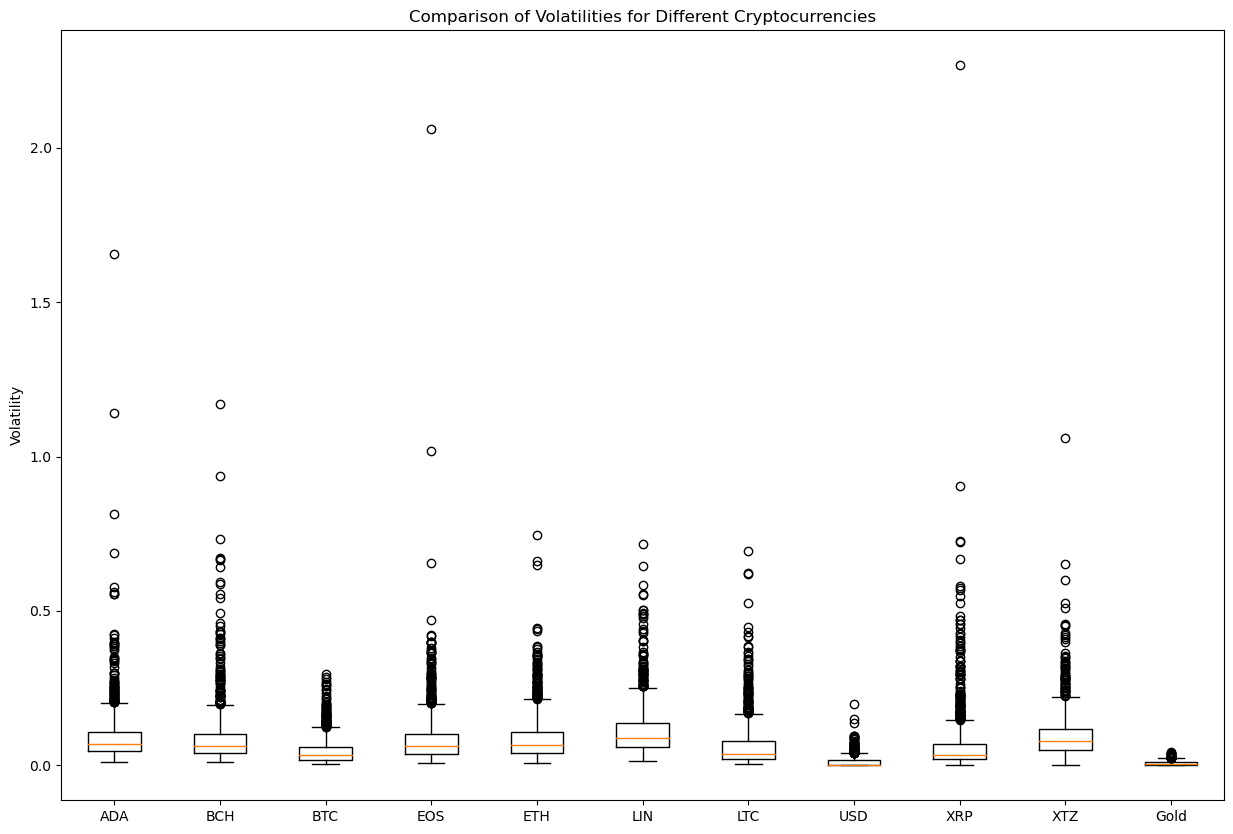

In [10]:
# get gold data
goldDf = pd.read_csv("Gold.csv")
# calculate volatility of Gold
goldVola = (goldDf["High"]-goldDf["Low"])/goldDf["Open"]
# add gold volatility to volatility dataframe
volatilityDf["Gold"] = goldVola
# plot boxplot again

plotBoxPlot()
